In [1]:
from sympy import *
import heppackv0 as hep

Reading heppackv0.py

Done


## 1) Kinematics

Amplitudes and cross section for Compton scattering, $\gamma+e\rightarrow\gamma+e$.
Energy momentum conservation reads $k_i+p_i=k_f+p_f$. The CM system is used where $p,\theta$ denote the photon energy and scattering angle, $E,m$ electron energy and mass. 

In [2]:
theta,t,t0,u,u0,x,y,z=symbols('theta t t0 u u0 x y z',real=True)
s,s0,E,p,m =symbols('s s0 E p m',positive=True)

In [3]:
ki=[p,0,0,0]
pin=[E,m,pi,pi]
kf=[p,0,theta,0]
pf=[E,m,pi-theta,pi]

CM energy squared $s=(k_i+p_i)^2$ and $s_0=s-m^2$  are expressed by CM variables:

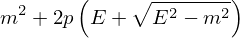

In [4]:
sCM=m**2+2*hep.dotprod4(hep.fourvec(ki),hep.fourvec(pin));sCM

In [5]:
sCM=m**2+2*p*(E+p);print('sCM= ');sCM

sCM= 


In [6]:
s0CM=2*p*(E+p);s0CM

It is not easy to express the scattering amplitudes by invariants. I found it best to 
express $p$ and $E$ by $s$ and $s_0$ and write all amplitudes as function of $s_0$,
$u_0=(k_i-p_f)^2-m^2$ and $t=(k_i-k_f)^2$ where the latter is mainly used as abbreviation
$t=-u_0-s_0$. One thus obtains rather simple expressions for $\sin(\theta/2)$ and
$\cos(\theta/2)$

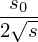

In [7]:
pCM=s0/2/sqrt(s);pCM

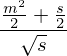

In [8]:
ECM=(s+m**2)/2/sqrt(s);ECM

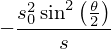

In [9]:
tCM=-4*pCM**2*sin(theta/2)**2;tCM

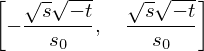

In [10]:
solve(t+4*pCM**2*sin(theta/2)**2,sin(theta/2))


sinthetahalf=


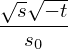

In [11]:
sinthetahalf=sqrt(-t*s)/s0;print('sinthetahalf=');sinthetahalf

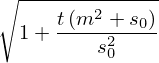

In [12]:
costhetahalf=sqrt(1-sinthetahalf**2).subs(s,s0+m**2);costhetahalf

costhetahalf=


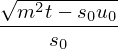

In [13]:
costhetahalf=sqrt(m**2*t-u0*s0)/s0;print('costhetahalf=');costhetahalf

## 2) The amplitudes

The scattering amplitude is determined by the sum of the $s$ channel and $u$ channel Feynman graph:

$$T_{{fi}}=e^{2}\bar{u}(p_f,s_f)\left(\not\!\varepsilon_f^*\frac{\not\! p_i+\not\! k_i+m}{(p_i+k_i)^{2}-m^{2}}\not\!\varepsilon_i+\not\!\varepsilon_i\frac{\not\! p_i-\not\! k_f+m}{(p_i-k_f)^{2}-m^{2}}\not\!\varepsilon_f^*\right)u(p,s_i)$$

The direct evaluation in the notebook is cumbersome. heppackv0.py contains the necessary procedure for calculating the 16 helicity amplitudes $T_{fi}=T_{\lambda_3 \lambda_4;\lambda_1 \lambda_2}$. 8 of these amplitudes are independent, here the 8 amplitudes for incoming photons with helicity $\lambda_1=-1$. The helicity of the incoming
and outgoing electrons are $\lambda_2$ and $\lambda_4$ respectively-

We evaluate generally the $s$ channel helicity amplitude 
$T^s_{\lambda_3\lambda_4;\lambda_1\lambda_2}$ and $u$ channel helicity amplitude $T^u_{\lambda_3\lambda_4;\lambda_1\lambda_2}$ separately by first calculating only the numerator and then dividing respectively by $s_0$ and $u_0$. 
In most cases $T^s_{\lambda_1\lambda_2;\lambda_3\lambda_4}=0$. 

### 2.1) $T1=T_{--;--}$

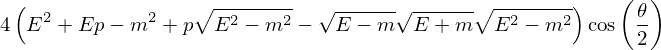

In [14]:
T1Sv1=simplify(hep.Ncompts(ki, -1, pin, -1, kf, -1, pf, -1));T1Sv1

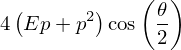

In [15]:
T1Sv1=4*cos(theta/2)*(p**2+E*p);T1Sv1

which is obviously $2s_0\cos(\theta/2)$. Dividing by $s_0$ yields

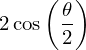

In [16]:
T1S=2*cos(theta/2);T1S

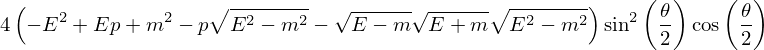

In [17]:
T1Uv1=simplify(hep.Ncomptu(ki, -1, pin, -1, kf, -1, pf, -1));T1Uv1

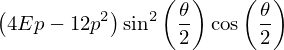

In [18]:
T1Uv1=4*(E*p-3*p**2)*sin(theta/2)**2*cos(theta/2);T1Uv1

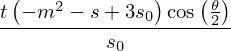

In [19]:
simplify(T1Uv1.subs(p,pCM).subs(E,ECM).subs(sin(theta/2),sinthetahalf))

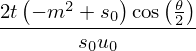

In [20]:
T1U=2*t*(s0-m**2)*cos(theta/2)/s0/u0;T1U

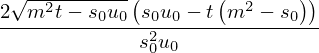

In [21]:
simplify((T1S+T1U).subs(cos(theta/2),costhetahalf))

T1= 


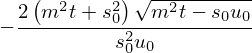

In [22]:
T1=-2*sqrt(m**2*t-s0*u0)*(m**2*t+s0**2)/s0**2/u0;print('T1= ');T1

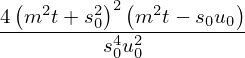

In [23]:
T1sq=simplify(T1**2);T1sq

The ampltude $T(--;--)$ can be written as $T(--;--)=t_1+t_2$ where $t_1$ depends only implicitly on $m$ and $t_2$ is proportional to $m^2$, i.e. $t_2=0$ in the high energy approximation or for $m=0$.

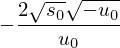

In [24]:
t_1=T1.subs(m,0);t_1

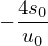

In [25]:
t_1sq=t_1**2;t_1sq

Next we calculate $T1sq-t_1^2$ and name it for notational simplicity t_2sq although it is not a real square and can be negative. 

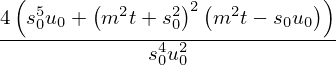

In [26]:
t_2sq=simplify(T1sq+4*s0/u0);t_2sq

In [27]:
t_2sq.subs(m,0)

### 2.2) $T2=T_{-+;--}$ :

In [28]:
T2S=simplify(hep.Ncompts(ki, -1, pin, -1, kf, -1, pf, 1));T2S

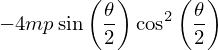

In [29]:
T2U=simplify(hep.Ncomptu(ki, -1, pin, -1, kf, -1, pf, 1));T2U

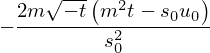

In [30]:
T2v1=T2U.subs(p,pCM).subs(sin(theta/2),sinthetahalf).subs(cos(theta/2),costhetahalf);T2v1

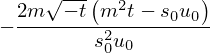

In [31]:
T2=T2v1/u0;T2

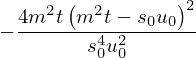

In [32]:
T2sq=T2**2;T2sq

### 2.3) $T3=T_{++;--}$ :

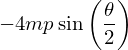

In [33]:
T3Sv1=simplify(hep.Ncompts(ki, -1, pin, -1, kf, 1, pf, 1));T3Sv1

In [34]:
tmp=simplify(T3Sv1.subs(p,pCM).subs(sin(theta/2),sinthetahalf));tmp

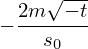

In [35]:
T3S=tmp/s0;T3S

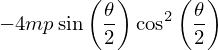

In [36]:
T3Uv1=simplify(hep.Ncomptu(ki, -1, pin, -1, kf, 1, pf, 1));T3Uv1

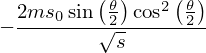

In [37]:
tmp=simplify(T3Uv1.subs(p,pCM));tmp

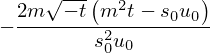

In [38]:
T3U=tmp.subs(sin(theta/2),sinthetahalf).subs(cos(theta/2),costhetahalf)/u0;T3U

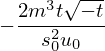

In [39]:
T3=simplify(T3S+T3U);T3

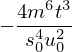

In [40]:
T3sq=T3**2;T3sq

### 2.4) $T4=T_{+-;--}$ :

In [41]:
T4S=simplify(hep.Ncompts(ki, -1, pin, -1, kf, 1, pf, -1));T4S

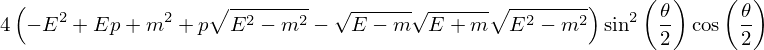

In [42]:
T4U=simplify(hep.Ncomptu(ki, -1, pin, -1, kf, 1, pf, -1));T4U

The factot inside the brackets is easiest reduced by hand to $Ep-p^2=\frac{m^2s_0}{2s}$ leading to 

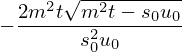

In [43]:
T4=2*m**2*s0/s*sinthetahalf**2*costhetahalf/u0;T4

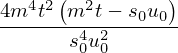

In [44]:
T4sq=T4**2;T4sq

Finally the 4 squared small terms for incoming lefthanded photons are collected:

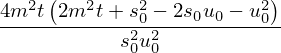

In [45]:
small1=simplify(t_2sq+T2sq+T3sq+T4sq);small1

### 2.5)  $T5=T_{--;-+}$ :

Now the 4 amplitudes for incoming electrons with helicity $+1/2$ are calculated:

In [46]:
T5S=simplify(hep.Ncompts(ki, -1, pin, 1, kf, -1, pf, -1));T5S

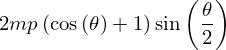

In [47]:
T5U=simplify(hep.Ncomptu(ki, -1, pin, 1, kf, -1, pf, -1));T5U

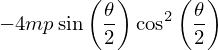

In [48]:
T2U

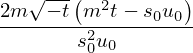

In [49]:
T5=-T2;T5

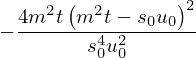

In [50]:
T5sq=T5**2;T5sq

### 2.6) $T6=T_{-+;-+}$ :

In [51]:
T6S=hep.Ncompts(ki, -1, pin, 1, kf, -1, pf, 1);T6S

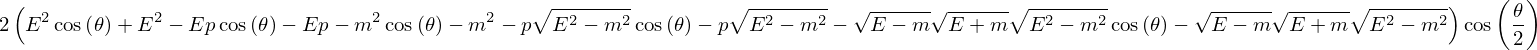

In [52]:
T6Uv1=hep.Ncomptu(ki, -1, pin, 1, kf, -1, pf, 1);T6Uv1

Sympy insists of converting expressions containing trigonometric functions of
$\theta/2$ into functions of $\theta$. I dont know how to avoid this. Therefore use brute force:

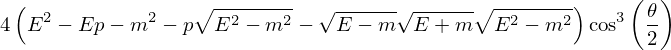

In [53]:
T6Uv2=simplify(T6Uv1.subs(cos(theta),2*cos(theta/2)**2-1));T6Uv2

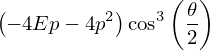

In [54]:
T6U=-4*(p**2+E*p)*cos(theta/2)**3;T6U

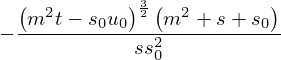

In [55]:
tmp=simplify(T6U.subs(p,pCM).subs(E,ECM).subs(cos(theta/2),costhetahalf));tmp

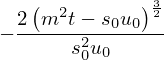

In [56]:
T6=-(sqrt(m**2*t-s0*u0))**3*2/s0**2/u0;T6

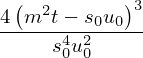

In [57]:
T6sq=T6**2;T6sq

Like T1 this amplitude consists of 2 terms, which can be separated by setting $m=0$

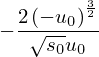

In [58]:
t_3=T6.subs(m,0);t_3

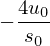

In [59]:
t_3sq=t_3**2;t_3sq

t_4sq is not a real square


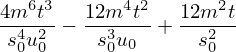

In [60]:
t_4sq=expand(T6**2+4*u0/s0);print('t_4sq is not a real square');t_4sq

### 2.7) $T7=T_{++;-+}$ :

In [61]:
T7S=expand_trig(hep.Ncompts(ki, -1, pin, 1, kf, 1, pf, 1));T7S

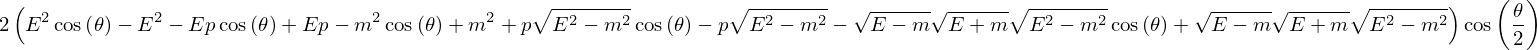

In [62]:
T7Uv1=expand_trig(hep.Ncomptu(ki, -1, pin, 1, kf, 1, pf, 1));T7Uv1

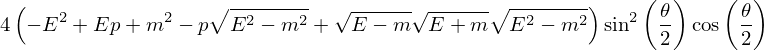

In [63]:
T7U=simplify(T7Uv1.subs(cos(theta),2*cos(theta/2)**2-1));T7U

This looks like T4U

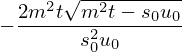

In [64]:
T7=T4;T7

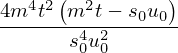

In [65]:
T7sq=T7**2;T7sq

### 2.8) $T8=T_{+-;-+}$ :

In [66]:
T8S=simplify(hep.Ncompts(ki, -1, pin, 1, kf, 1, pf, -1));T8S

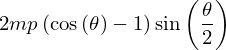

In [67]:
T8Uv1=simplify(hep.Ncomptu(ki, -1, pin, 1, kf, 1, pf, -1));T8Uv1

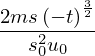

In [68]:
T8=simplify((4*m*p*sinthetahalf**3/u0).subs(p,pCM));T8

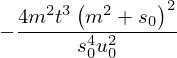

In [69]:
T8sq=(T8.subs(s,s0+m**2))**2;T8sq

The second set of small terms is given by the sum of the squared $T5$ to $T8$. Finally the small terms are
collected.

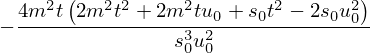

In [70]:
small2=simplify(T5sq+t_4sq+T7sq+T8sq);small2

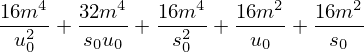

In [71]:
tmp1=simplify(small1+small2)
small=simplify(tmp1.subs(t,-s0-u0));small

## 3) Cross section 
The small terms have a clear structure:

Define R


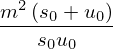

In [72]:
R=m**2/u0/s0*(s0+u0);print('Define R');R

In [73]:
simplify(small-16*(R+R**2))

simpler alternative expression for R


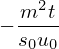

In [74]:
R=-m**2*t/s0/u0;print('simpler alternative expression for R');R

Putting all pieces together the sqared average of the amplitudes is given by 

tsqav= 


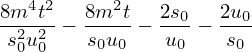

In [75]:
tsqav=-2*u0/s0-2*s0/u0+8*(R+R**2);print('tsqav= ');tsqav

i.e.

$$\overline{\sum}{T_{fi}^2}=\left(\frac{-2u_0}{s_0}+\frac{2s_0}{-u_0}
+\frac{-8m^2t}{s_0u_0}+\frac{8m^4t^2}{s_0^2u_0^2}\right)\enspace .$$

The cross section $d\sigma/dt$ is obtained by multiplication with the kinematic factor $1/16\pi s_0^2$ and the charge
factor $e^4=16\pi^2\alpha^2$ with the final result

$$\frac{\mathrm{d}\sigma}{\mathrm{d}t}(\gamma e^{-}\rightarrow\gamma e^{-})=\frac{2\pi\alpha^{2}}{s_0^{2}}\left(\frac{-u_0}{s_0}+\frac{s_0}{-u_0}
+\frac{-4m^2t}{s_0u_0}+\frac{4m^4t^2}{s_0^2u_0^2}\right)\enspace.$$
or 
$$\frac{\mathrm{d}\sigma}{\mathrm{d}t}(\gamma e^{-}\rightarrow\gamma e^{-})=\frac{2\pi\alpha^{2}}{s_0^{2}}\left(\frac{-u_0}{s_0}+\frac{s_0}{-u_0}
-\frac{1}{2}g(s,t)\right)$$
with $$g(s,t)= -8(R+R^2)=\frac{8m^2t}{s_0u_0}-\frac{8m^4t^2}{s_0^2u_0^2}\enspace .$$
$g(s,t)/2$ is sometimes (see e.g. S. Gasiorowicz, Elementary Particle Physics) quoted as
$$g(s,t)=1-\left(\frac{s+m^{2}}{s-m^{2}}-\frac{2m^{2}}{s+t-m^{2}}\right)^{2}\enspace,$$ which is of course 
equivalent to my definition.

Proof:


In [76]:
simplify((1-((s0+2*m**2)/s0+2*m**2/u0)**2+4*(R+R**2)).subs(t,-s0-u0))

For photon scattering off an electron at rest (so called laboratory system) the cross section reads
particullary simple. Let $\omega,\omega'$ denote the energy of the incoming and outgoing photon respectively and
$\theta$ its scattering angle. Then $s_0=2m\omega,\,\,t=-4\omega\omega'\sin^2(\theta/2)$ and using the definition $u=(k_f-p_i)^2$ 
one gets $u_0=-2m\omega'$. Without invoking computer algebra this leads to $R=-\sin^2(\theta/2)$ and 
$$\frac{\mathrm{d}\sigma}{\mathrm{dt}}=\frac{\pi\alpha^{2}}{2m^{2}\omega^2}\left(\frac{\omega^{{\prime}}}{\omega}+\frac{\omega}{\omega^{{\prime}}}-\sin^{2}\theta\right)\enspace$$ or
$$\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}=\frac{\alpha^{2}}{2m^{2}}\left(\frac{\omega^{{\prime}}}{\omega}\right)^{2}\left(\frac{\omega^{{\prime}}}{\omega}+\frac{\omega}{\omega^{{\prime}}}-\sin^{2}\theta\right)\enspace.$$

At low energies $\omega\rightarrow\omega^{{\prime}}$ and therefore
$$\frac{\mathrm{d}\sigma}{\mathrm{d}\Omega}=\frac{\alpha^{2}}{2m^{2}}\left(2-\sin^{2}\theta\right)\enspace,$$
which is the result of classical physics (Thomson scattering).

Sometimes it is usefull to express cross sections and amplitudes in terms of dimensionless invariants. Taking $s_0=xm^2$ and $y=1+u_0/s_0=-t/s_0$ yields
$$y=\frac{x\sin^2(\theta/2)}{1+x}$$
and
$$\frac{u_0}{s_0}=\frac{-(1+x\cos^2(\theta/2)}{1+x}$$
in the CM system.

The range of $x$ and $y$ is given by $1\leq x<\infty$ and $0\leq y\leq x/(1+x)$, where the
second relation is read off the CM expression for $y$.
Using these new variables we get nice alternative expressions  for $R$ and $\overline{\sum}{T_{fi}^2}$.

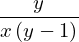

In [77]:
altR=R.subs(u0,(y-1)*s0).subs(s0,x*m**2).subs(t,-m**2*x*y);altR

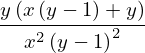

In [78]:
simplify(altR+altR**2)

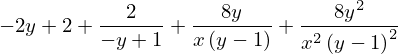

In [79]:
tsqavV1=2*(1-y)+2/(1-y)+8*altR+8*altR**2;tsqavV1

or even nicer
$$\overline{\sum}{T_{fi}^2}=2(1-y)+\frac{2}{1-y}-8\frac{y}{x(1-y)}+8\frac{y^2}{x^2(1-y)^2}$$

## 4) Discussion
The dependence of the cross section on $s,\theta$ is not obvious. For a better understanding
we plot $\overline{\sum}{T_{fi}^2}$ as function of $x,y$ where $y$ is expressed by the CM scattering angle $\theta$.

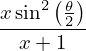

In [80]:
yCM=simplify((-tCM/s0).subs(s,s0+m**2).subs(s0,x*m**2));yCM

As said above $T1=t_1+t_2$ with $t_1=2/\sqrt{1-y}$ (which does not depend on $m^2$ explicitly), $t_2\sim m^2$. Similarly $T6=t_3+t_4$ with $t_3=2\sqrt{1-y}$ and
$t_4\sim m^2$. We might call $t_1,t_3$ the big amplitudes because the dont vanish in the limit
$m^2\rightarrow 0$. The contribution of the big and small parts to $\overline{\sum}{T_{fi}^2}$
is written as function of $x,\theta$ in the following cells:

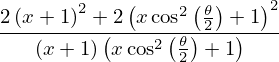

In [81]:
bigplot=simplify((2*(1-yCM)**2+2)/(1-yCM));bigplot

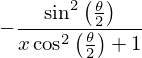

In [82]:
Rplot=simplify(altR.subs(y,yCM));Rplot

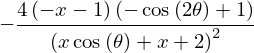

In [83]:
gplot=-8*simplify(Rplot+Rplot**2);gplot

In [84]:
sigplot=bigplot-gplot

The cross section peaks in backward direction (red curve in fig. 1). The fig also
demonstrates that already for $\theta > 150^\circ$ $\overline{\sum}{T_{fi}^2}$ is very well approximated by $t_1^2/2=-2/(1-y)=-2s_0/u_0$ (green curve) alone. $y$ depends implicitly on $m^2$ (cell 80). In the limit $m^2\rightarrow 0$ all small terms vanish and with $x\rightarrow \infty$ we get 
$t^2_1=4/\cos^2(\theta/2)$. The last equality leads, however, to a very bad approximation for $\overline{\sum}{T_{fi}^2}$ (blue curve). 

$x=50$ corresponds to $\sqrt{s}\approx$ 4 MeV, which is far in the relativistic regime. The reader is invited to vary the parameters.


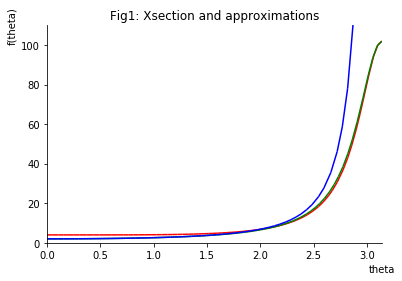

In [105]:
p1=plot(sigplot.subs(x,50),2/(1-yCM).subs(x,50),2/cos(theta/2)**2,(theta,0,pi),
title='Fig1: Xsection and approximations',ylim=(0,110),show=False)
p1[0].line_color='r'
p1[1].line_color='g'
p1[2].line_color='b'
p1.show()

We get more insight into the subtle cancellations taking place by inspecting $T1^2=T^2_{--;--}$:

In [86]:
T1sqplot=simplify(T1sq.subs(t,-yCM*s0).subs(u0,(yCM-1)*s0).subs(s0,x*m**2))

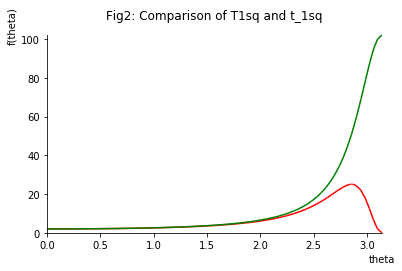

In [87]:
p2=plot(T1sqplot.subs(x,50)/2,2/(1-yCM).subs(x,50),
(theta,0,pi),title='Fig2: Comparison of T1sq and t_1sq',show=False)
p2[0].line_color='r'
p2[1].line_color='g'
p2.show()

Angular momentum  conservation $\Delta J_3=0$ requires $T_{--;--}=0$ at $\theta=\pi$. This is indeed the case, as is shown by the red curve in fig. 2 which bends over due to the large negative t_2sq. On the other hands side  $t_1^2/2$ which yields such a good approximation to $\overline{\sum}{T_{fi}^2}$ badly violates the
request $T_{--;--}=0$ in the backward direction. The gap between the green and the red curve is miraculously filled by the angular momentum conserving helicity flip amplitudes 
$T_{++;--}=T3$ and $T_{+-;-+}=T8$.

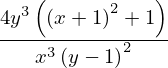

In [88]:
Tflipsq=simplify((T3sq+T8sq).subs(t,-y*s0).subs(u0,(y-1)*s0).subs(s0,x*m**2));Tflipsq

In [89]:
Tflipsqplot=Tflipsq.subs(y,yCM)

In [90]:
t_2sqplot=simplify(t_2sq.subs(t,-yCM*s0).subs(u0,(yCM-1)*s0).subs(s0,x*m**2))

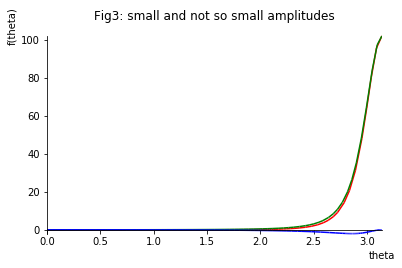

In [91]:
p3=plot(Tflipsqplot.subs(x,50)/2,-t_2sqplot.subs(x,50)/2,
-gplot.subs(x,50),(theta,0,pi),title='Fig3: small and not so small amplitudes',show=False)
p3[0].line_color='r'
p3[1].line_color='g'
p3[2].line_color='b'
p3.show()

Looking at the green and red curve one finds indeed $t_2sq$ is approximately given by 
$T^2_{++;--}+T^2_{+-;-+}$. The lesson to be learned is that some of  the so called small amplitudes ($\sim m^2$) are not at all small in the limit 
$\theta\rightarrow \pi$ but of the order $2s_0/m^2$. The takeover of the "small" amplitudes
(peak of the red curve in fig.2) occurs at $\cos(\theta/2)\approx\sqrt{m^2/s_0}=\sqrt{1/x}$
for $x>5$. Compare the really small $g(s_0,\theta)$, plotted in blue.



## 5) Polarization

To begin with the transfer of circular polarization from the incoming to the outgoing
photon is investgated in the CM system. It is given by 
$T1^2+T2^2+T5^2+T6^2-T3^2-T4^2-T7^2-T8^2$. We start with the small terms.

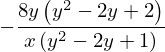

In [92]:
lpsmall=simplify((t_2sq+T2sq+T5sq+t_4sq
-T3sq-T4sq-T7sq-T8sq).subs(t,-y*s0).subs(u0,(y-1)*s0).subs(s0,x*m**2));lpsmall

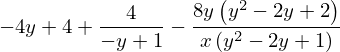

In [93]:
lp=lpsmall+4*(1-y)+4/(1-y);lp

The polarization degree of the outgoing photon is obtained by deviding lp by 
$2\overline{\sum}{T_{fi}^2}$

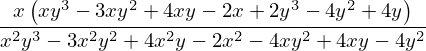

In [94]:
lpdeg=simplify(lp/2/tsqavV1);lpdeg

In [95]:
lpdegplot=lpdeg.subs(y,yCM)

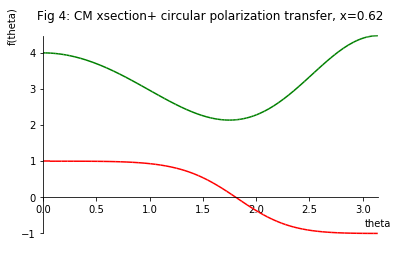

In [96]:
p4=plot(lpdegplot.subs(x,0.62),sigplot.subs(x,0.62),(theta,0,pi),
title='Fig 4: CM xsection+ circular polarization transfer, x=0.62',show=False)
p4[0].line_color='r'
p4[1].line_color='g'
p4.show()

In the nonrelativistic regime (Thomson scattering) lefthanded photons flip to righthanded photons in the backward direction. $x=0.62$ corresponds to the scattering of laser photons by
20 GeV electrons at SLAC producing high energy photons in the backward direction. Our result
for $\theta \rightarrow \pi$ remains valid because the Lorentz transformation is along the
$z$-axis.

In the relativistic regime (e.g. $x=10$, fig. 5) we also observe a flip of CM circular polarization in the
backward direction where the cross section is largest. The flip again occurs at
$\cos(\theta/2)\approx\sqrt{m^2/s_0}=\sqrt{1/x}$.

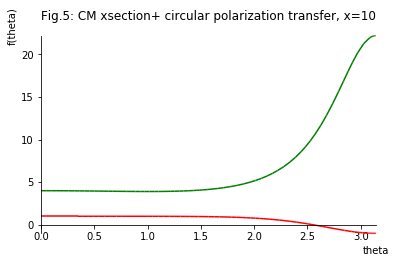

In [97]:
p5=plot(lpdegplot.subs(x,10),sigplot.subs(x,10),(theta,0,pi),
title='Fig.5: CM xsection+ circular polarization transfer, x=10',show=False)
p5[0].line_color='r'
p5[1].line_color='g'
p5.show()

Compton scattering may be used to measure the polarization of the incoming electrons. For electrons with helicity -1/2 scattering off photons with helicity -1
one has $J_3=1/2$ and $\sigma_{1/2}\sim\sum{T_{xx,--}^2}$ .
For the scattering of 
positive helicity electrons  $\sigma_{3/2}\sim \sum{T_{xx,-+}^2}$ holds.

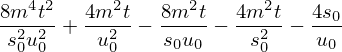

In [98]:
sigonehalf=simplify(T1sq+T2sq+T3sq+T4sq);sigonehalf

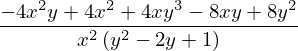

In [99]:
sigonehalfv1=simplify(sigonehalf.subs(t,-y*s0).subs(u0,(y-1)*s0).subs(s0,x*m**2));sigonehalfv1

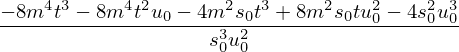

In [100]:
sigthreehalf=simplify(T5sq+T6sq+T7sq+T8sq);sigthreehalf

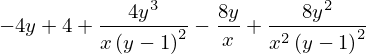

In [101]:
sigthreehalfv1=simplify(sigthreehalf.subs(t,-y*s0).subs(u0,(y-1)*s0).subs(s0,x*m**2));
sigthreehalfv1

In the planned international linear collider ILC a beam of $E=250$ GeV lefthanded electrons is foreseen. Its polarization may be determined by measuring the Compton cross section in backward direction (G. Mortgaat-Pick et al., Phys.Rept. 460, 131, 2008). A 532 nm laser beam ($\omega=2.33$ eV) is directed along the negative $z$-axis versus the incoming electrons. Therefore $s_0=4\omega E$ and $y=\omega'/E\sin^2(\theta/2)$ which is approximately
$\omega'/E$ for photon scattering angles $\theta$ near $\theta=\pi$. With $x=8.9$ we have $y_{max}=0.9$ resulting in
photons of energy $\omega'=225$ GeV or electrons of $E=25$ GeV along the positive $z$-axis. 
Fig.6 shows $\sigma_{1/2}$ and $\sigma_{3/2}$ plotted versus $y=\omega'/E$ (again neglecting 
common factors needed to convert sqared amplitudes into cross sections). At high $y$
a large difference between $\sigma_{1/2}$ and $\sigma_{3/2}$ is observed.

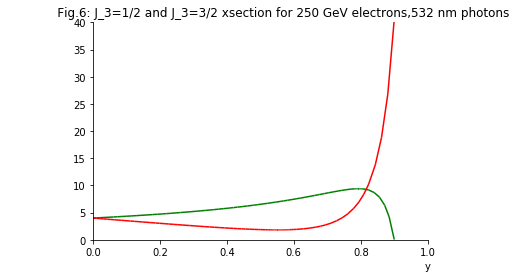

In [102]:
p6=plot(sigonehalfv1.subs(x,8.9),sigthreehalfv1.subs(x,8.9),(y,0,0.9),ylabel=' ',
title='             Fig.6: J_3=1/2 and J_3=3/2 xsection for 250 GeV electrons,532 nm photons ',
ylim=(0,40),xlim=(0,1),show=False)
p6[0].line_color='g'
p6[1].line_color='r'
p6.show()


$y_{max}$ is reached for $\theta=\pi$. However, due to the enormous Lorentz-boost all scattering angle are close to $\pi$ and therefor $y$ depends very strongly on $\theta$.
This can be understood by squaring the fourmomentum conservation $k_i+p_i-k_f=p_f$ yielding
$$k_i\cdot p_i-k_i\cdot k_f-k_f\cdot p_i=0\enspace ,$$
which reads using the ILC kinematic variables ($\beta E$ is the momentum of the incoming electron)
$$\omega E(1+\beta)-\omega\omega' (1-\cos\theta)-\omega' E(1+\beta\cos\theta)=0\enspace .$$
We set $\theta=\pi-\chi$ with a very small  angle $\chi$. It is safe to set $\beta=1$ in the first term and 
$\cos\theta=-1$ in the second term. The 3rd term requires more care. Using 
$\beta\approx 1-m^2/2E^2$ and $\cos\theta\approx -1+\chi^2/2$ one gets 
$1+\beta\cos\theta=m^2/2E^2+\chi^2/2$ resulting in
$$y=\frac{\omega}{\omega +\frac{m^2}{4E}+\frac{E\chi^2}{4}}$$ or counting $\chi$ in 
multiples $n\chi_0$ of $\chi_0=m/E$
$$y=\frac{1}{1 +\frac{1}{x}+\frac{n^2}{x}}=\frac{x}{1 +n^2+x}\enspace .$$
Considering the extremely small value of $\chi_0$ the outgoing photons and electrons
travel along the $z$ axis together with the electron beam. Note that for practical reasons the laser beam is directed at a small angele (say 10 mrad) with respect to the $z$ axis. For measuring the Compton cross section it is probably easiest to magnetically separate the low energy electrons coresponding to the high $y$ cross section. 

For unpolarized beams the Compton cross section may be written as
$\sigma_U=(\sigma_{1/2}+\sigma_{3/2})/2$ whereas for partially polarized electron and photon beams the cross section is given by
$$\sigma_P=(1-P_eP_\gamma)\sigma_U+P_eP_\gamma\sigma_{1/2}$$
or
$$\sigma_P=\sigma_U(1+P_eP_\gamma A)\enspace ,$$
where the analyzing power $A$ is given by
$$A=\frac{\sigma_{1/2}-\sigma_{3/2}}{\sigma_{1/2}+\sigma_{3/2}}\enspace .$$
This quantity is plotted in fig.7 for the example of fig.6.

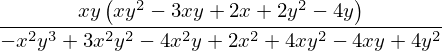

In [103]:
A=simplify((sigonehalfv1-sigthreehalfv1)/(sigonehalfv1+sigthreehalfv1));A

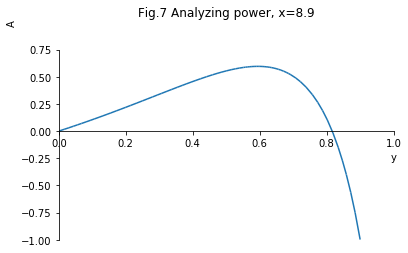

In [104]:
p7=plot(A.subs(x,8.9),(y,0,0.9),ylim=(-1,1),xlim=(0,1),title=('Fig.7 Analyzing power, x=8.9'),
ylabel=('A'))

## 6) Related cross sections
$\overline{\sum}{T_{fi}^2}$ for $\gamma\gamma\rightarrow e^-e^+$ can be obtained  from
the corresponing Compton scattering formula via the exchange $s \leftrightarrow t$ plus multiplication by -1 (using the abbreviatons $s_0=s-m^2$ etc).
$$\overline{\sum}{T_{fi}^2}=\left(\frac{2u_0}{t_0}+\frac{2t_0}{u_0}
+\frac{8m^2s}{t_0u_0}-\frac{8m^4s^2}{t_0^2u_0^2}\right)\enspace .$$
Multiplication with the kinematic factor $1/16\pi s(s-4m^2)$ and the charge
factor $e^4=16\pi^2\alpha^2$ yields the formula for the differential cross section
$$\frac{\mathrm{d}\sigma}{\mathrm{d}t}(\gamma\gamma\rightarrow e^{-} e^{+})=\frac{2\pi\alpha^2}{s(s-4m^2)}\left(\frac{u_0}{t_0}+\frac{t_0}{u_0}
+\frac{4m^2s}{t_0u_0}-\frac{4m^4s^2}{t_0^2u_0^2}\right)$$
and finally
$$\frac{\mathrm{d}\sigma}{\mathrm{d}t}(e^{-} e^{+}\rightarrow \gamma\gamma)=\frac{2\pi\alpha^2}{s^2}\left(\frac{u_0}{t_0}+\frac{t_0}{u_0}
+\frac{4m^2s}{t_0u_0}-\frac{4m^4s^2}{t_0^2u_0^2}\right)\enspace .$$